In [7]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

(x_train, _), (x_test, _) = mnist.load_data()

In [8]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape(len(x_train), 784)
x_test = x_test.reshape(len(x_test), 784)

input_dim = 784
encoding_dim = 32

In [9]:
input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)

decoded = Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = Model(input_layer, decoded)

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

Epoch 1/20
235/235 [==============================] - 6s 22ms/step - loss: 0.2763 - val_loss: 0.1914
Epoch 2/20
235/235 [==============================] - 2s 10ms/step - loss: 0.1715 - val_loss: 0.1535
Epoch 3/20
235/235 [==============================] - 2s 10ms/step - loss: 0.1441 - val_loss: 0.1333
Epoch 4/20
235/235 [==============================] - 2s 10ms/step - loss: 0.1281 - val_loss: 0.1208
Epoch 5/20
235/235 [==============================] - 3s 12ms/step - loss: 0.1180 - val_loss: 0.1127
Epoch 6/20
235/235 [==============================] - 3s 13ms/step - loss: 0.1113 - val_loss: 0.1071
Epoch 7/20
235/235 [==============================] - 2s 11ms/step - loss: 0.1065 - val_loss: 0.1030
Epoch 8/20
235/235 [==============================] - 2s 10ms/step - loss: 0.1028 - val_loss: 0.0999
Epoch 9/20
235/235 [==============================] - 2s 10ms/step - loss: 0.1000 - val_loss: 0.0975
Epoch 10/20
235/235 [==============================] - 3s 12ms/step - loss: 0.0980 - val_lo

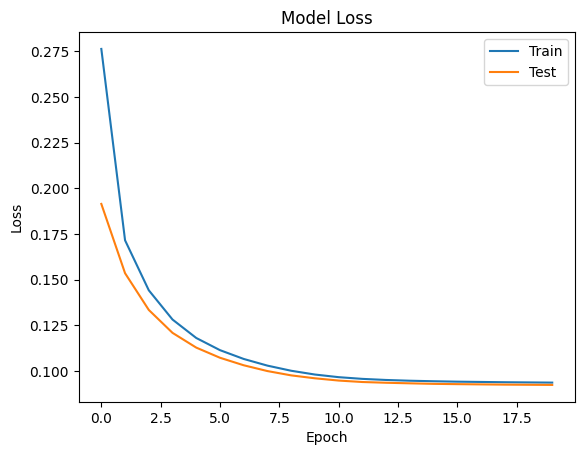

In [5]:
# Навчання моделі
epochs = 20
batch_size = 256
history = autoencoder.fit(x_train, x_train,
                          epochs=epochs,
                          batch_size=batch_size,
                          shuffle=True,
                          validation_data=(x_test, x_test))

# Візуалізація функції втрат
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

313/313 [==============================] - 1s 2ms/step


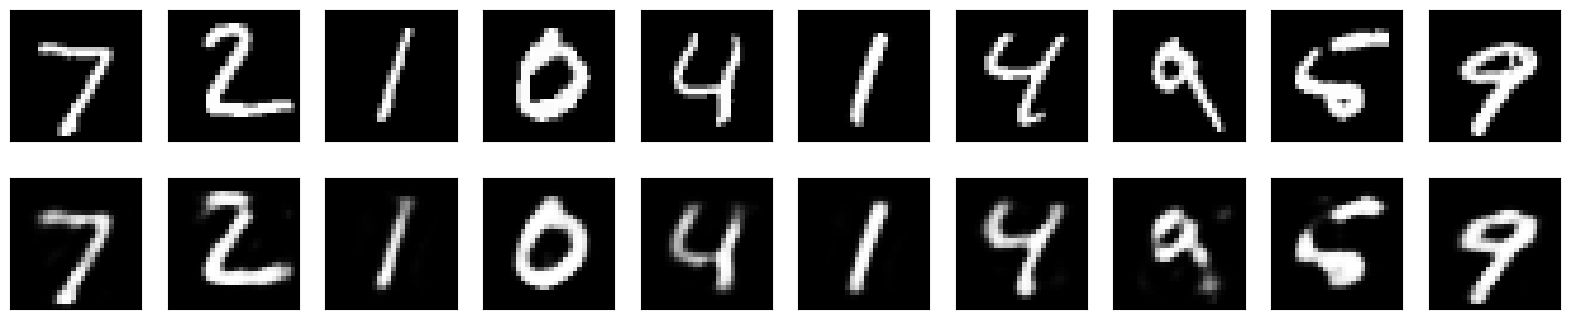

In [6]:


# Реконструкція тестових зображень
decoded_imgs = autoencoder.predict(x_test)

# Візуалізація реконструйованих зображень
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

Висновок: на лаб. роботі ми зробили графік функції втрат, а також порівняння вихідних і реконструйованих зображень. Це допоможе оцінити ефективність автокодувальника на основі багатошарової нейронної мережі для реконструкції рукописних цифр із датасету MNIST.